In [1]:
!ls -la

total 630560
drwxr-xr-x 1 root root      4096 Jul 25 19:40 .
drwxr-xr-x 1 root root      4096 Jul 25 19:36 ..
drwxr-xr-x 4 root root      4096 Jul 24 13:22 .config
-rw-r--r-- 1 root root 645672960 Jul 24 23:15 lit_panel_aggr_v2.duckdb
drwxr-xr-x 1 root root      4096 Jul 24 13:22 sample_data


In [2]:
!curl -IL https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_panel_aggr_v2.duckdb

HTTP/1.1 200 OK
x-amz-id-2: nMRm67gMQe3vX5zKUWbdDWYsh5i8Ty1Jx5aJhXmNMuHxXxtv4bM56cvRHmkypwuENjByR+RHECDgxMyQv4GhGfHUgFjx5x8mcqTWBH3gU04=
x-amz-request-id: 9X5ZEWVZ8JSJ0ZVP
Date: Thu, 25 Jul 2024 19:42:58 GMT
Last-Modified: Wed, 24 Jul 2024 23:15:17 GMT
ETag: "940727c2327b7510e63598c01b368c71-77"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: binary/octet-stream
Server: AmazonS3
Content-Length: 645672960



In [3]:
!time wget --no-clobber https://3253-machine-learning.s3.ca-central-1.amazonaws.com/lit_panel_aggr_v2.duckdb

File ‘lit_panel_aggr_v2.duckdb’ already there; not retrieving.


real	0m0.027s
user	0m0.003s
sys	0m0.003s


In [4]:
import duckdb

conn = duckdb.connect('lit_panel_aggr_v2.duckdb')

In [5]:
# Import libraries
import pandas as pd
import numpy as np

In [29]:
AAPL = conn.sql("SELECT * FROM lit_panel_aggr_v2 WHERE issuerTradingSymbol = 'AAPL'").df()
display(AAPL)

,URL,acceptanceDatetime,accessionNumber,type,period,issuerCIK,documentType,periodOfReport,notSubjectToSection16,issuerTradingSymbol,...,securityTitle,transactionFormType,transactionCode,equitySwapInvolved,transactionTimeliness,directOrIndirectOwnership,natureOfOwnership,_total_transaction_shares,_total_transaction_amount,count_star()
0,https://www.sec.gov/Archives/edgar/data/121415...,20080326214056,0001181431-08-021471,4,20080324,0000320193,4,2008-03-24,0,AAPL,...,Common Stock,4.0,S,0,None,D,None,22500.0,3137078.00,30
1,https://www.sec.gov/Archives/edgar/data/121415...,20080326214307,0001181431-08-021473,4,20080324,0000320193,4,2008-03-24,0,AAPL,...,Common Stock,4.0,S,0,None,D,None,16400.0,2298256.00,30
2,https://www.sec.gov/Archives/edgar/data/121415...,20080326214001,0001181431-08-021470,4,20080324,0000320193,4,2008-03-24,0,AAPL,...,Common Stock,4.0,S,0,None,D,None,14900.0,2069450.00,30
3,https://www.sec.gov/Archives/edgar/data/121415...,20080326213923,0001181431-08-021469,4,20080324,0000320193,4,2008-03-24,0,AAPL,...,Common Stock,4.0,S,0,None,D,None,12400.0,1708746.30,30
4,https://www.sec.gov/Archives/edgar/data/121415...,20080326214231,0001181431-08-021472,4,20080324,0000320193,4,2008-03-24,0,AAPL,...,Common Stock,4.0,S,0,None,D,None,21200.0,2963182.00,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,https://www.sec.gov/Archives/edgar/data/152888...,20151005183130,0001209191-15-074143,4,20151001,0000320193,4,2015-10-01,0,AAPL,...,Common Stock,5.0,G,0,E,D,None,45541.0,0.00,1
2923,https://www.sec.gov/Archives/edgar/data/155720...,20151005183420,0001209191-15-074151,4,20151001,0000320193,4,2015-10-01,0,AAPL,...,Restricted Stock Unit,4.0,M,0,None,D,None,92764.0,NaN,1
2924,https://www.sec.gov/Archives/edgar/data/155720...,20151019183155,0001209191-15-076174,4,20151015,0000320193,4,2015-10-15,0,AAPL,...,Common Stock,4.0,M,0,None,D,None,17500.0,NaN,1
2925,https://www.sec.gov/Archives/edgar/data/155720...,20151019183155,0001209191-15-076174,4,20151015,0000320193,4,2015-10-15,0,AAPL,...,Common Stock,4.0,F,0,None,D,None,8698.0,972958.28,1


In [30]:
AAPL.shape


(2927, 25)

In [31]:
AAPL.columns

Index(['URL', 'acceptanceDatetime', 'accessionNumber', 'type', 'period',
       'issuerCIK', 'documentType', 'periodOfReport', 'notSubjectToSection16',
       'issuerTradingSymbol', 'm_isDirector', 'm_isOfficer',
       'm_isTenPercentOwner', 'm_isOther', 'transactionType', 'securityTitle',
       'transactionFormType', 'transactionCode', 'equitySwapInvolved',
       'transactionTimeliness', 'directOrIndirectOwnership',
       'natureOfOwnership', '_total_transaction_shares',
       '_total_transaction_amount', 'count_star()'],
      dtype='object')

In [32]:
# List of columns to drop
columns_to_drop = ['type', 'notSubjectToSection16',
                        'issuerTradingSymbol', 'equitySwapInvolved',
                        'transactionFormType', 'count_star()', 'transactionTimeliness',
                        'natureOfOwnership', 'periodOfReport',
                        'directOrIndirectOwnership']

# Drop these columns from the DataFrame
AAPL = AAPL.drop(columns=columns_to_drop)
AAPL.columns


Index(['URL', 'acceptanceDatetime', 'accessionNumber', 'period', 'issuerCIK',
       'documentType', 'm_isDirector', 'm_isOfficer', 'm_isTenPercentOwner',
       'm_isOther', 'transactionType', 'securityTitle', 'transactionCode',
       '_total_transaction_shares', '_total_transaction_amount'],
      dtype='object')

In [33]:
# count_rows = AAPL[(AAPL['transactionCode'] == 'M') & (AAPL['_total_transaction_amount'].notnull())].shape[0]
# print(f'M count is {count_rows}')

# Extract the number between the last and second last '/' and add it to a new column
AAPL['rptOwnerCik'] = AAPL['URL'].str.extract(r'/data/(\d+)/')

# Confirm the value is a string of length 14
AAPL['acceptanceDatetime'] = AAPL['acceptanceDatetime'].astype(str)
valid_length = AAPL['acceptanceDatetime'].str.len() == 14

# Extract components if the length is valid
AAPL.loc[valid_length, 'year'] = AAPL['acceptanceDatetime'].str[:4].astype(int)
AAPL.loc[valid_length, 'month'] = AAPL['acceptanceDatetime'].str[4:6].astype(int)
AAPL.loc[valid_length, 'day'] = AAPL['acceptanceDatetime'].str[6:8].astype(int)
AAPL.loc[valid_length, 'hour'] = AAPL['acceptanceDatetime'].str[8:10].astype(int)
AAPL.loc[valid_length, 'minute'] = AAPL['acceptanceDatetime'].str[10:12].astype(int)

# Convert m_is... to booleans
AAPL['m_isDirector'] = AAPL['m_isDirector'].astype(bool)
AAPL['m_isOfficer'] = AAPL['m_isOfficer'].astype(bool)
AAPL['m_isTenPercentOwner'] = AAPL['m_isTenPercentOwner'].astype(bool)
AAPL['m_isOther'] = AAPL['m_isOther'].astype(bool)

# Confirm the value is a string of length 8
AAPL['period'] = AAPL['period'].astype(str)
valid_length = AAPL['period'].str.len() == 8

# Extract components if the length is valid and convert to integers
AAPL.loc[valid_length, 'periodYear'] = AAPL['period'].str[:4].astype(int)
AAPL.loc[valid_length, 'periodMonth'] = AAPL['period'].str[4:6].astype(int)
AAPL.loc[valid_length, 'periodDay'] = AAPL['period'].str[6:8].astype(int)

# Calculate averageSharePrice only for rows where both values are not None
valid_rows = AAPL['_total_transaction_amount'].notna() & AAPL['_total_transaction_shares'].notna()
AAPL.loc[valid_rows, 'averageSharePrice'] = AAPL.loc[valid_rows, '_total_transaction_amount'] / AAPL.loc[valid_rows, '_total_transaction_shares']

In [34]:
columns_to_drop_after_cleansing = ['URL', 'acceptanceDatetime', 'period']
AAPL = AAPL.drop(columns=columns_to_drop_after_cleansing)
AAPL.columns

Index(['accessionNumber', 'issuerCIK', 'documentType', 'm_isDirector',
       'm_isOfficer', 'm_isTenPercentOwner', 'm_isOther', 'transactionType',
       'securityTitle', 'transactionCode', '_total_transaction_shares',
       '_total_transaction_amount', 'rptOwnerCik', 'year', 'month', 'day',
       'hour', 'minute', 'periodYear', 'periodMonth', 'periodDay',
       'averageSharePrice'],
      dtype='object')

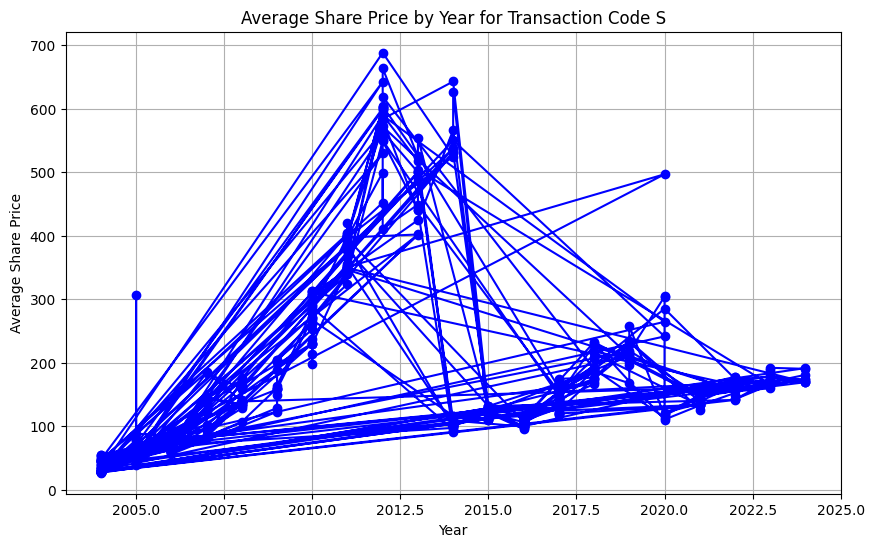

In [36]:
import matplotlib.pyplot as plt
# Filter rows where transactionCode is 'S'
AAPL_filtered = AAPL[AAPL['transactionCode'] == 'S']

# Plot averageSharePrice against periodYear
plt.figure(figsize=(10, 6))
plt.plot(AAPL_filtered['periodYear'], AAPL_filtered['averageSharePrice'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Share Price')
plt.title('Average Share Price by Year for Transaction Code S')
plt.grid(True)
plt.show()

In [35]:
# Code for downloading a DF to CSV

from google.colab import files

# Convert DataFrame to CSV
AAPL.to_csv('AAPL_july25.csv', index=False)  # Avoid saving the index as a column

# Trigger a browser download
files.download('AAPL_july25.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>